**Penentuan Intensitas Lampu Jalan Otomatis Berdasarkan Kepadatan Kendaraan dan Waktu Hari**

===== HASIL PERHITUNGAN =====
Kepadatan  : 65
Waktu Hari : 20

Hasil Mamdani : 88.33%
Hasil Sugeno  : 90.00%


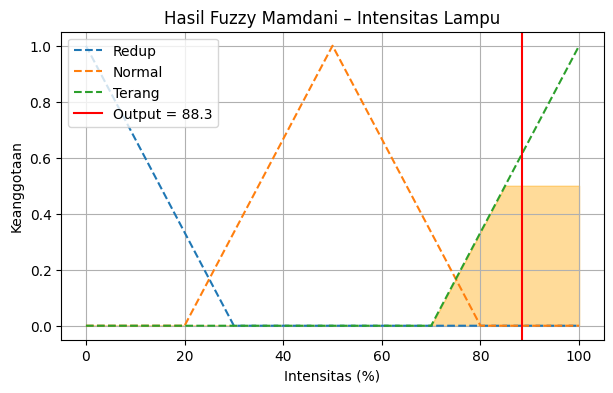

In [3]:
# ================================================================
# UAS – Fuzzy Logic Mamdani & Sugeno
# Kasus: Intensitas Lampu Jalan Berdasarkan Kepadatan & Waktu Hari
# ================================================================

import numpy as np
import matplotlib.pyplot as plt

!pip install scikit-fuzzy
import skfuzzy as fuzz

# ================================================================
# 1. DEFINISI UNIVERSE
# ================================================================
kepadatan = np.arange(0, 101, 1)
waktu = np.arange(0, 25, 1)
lampu = np.arange(0, 101, 1)

# ================================================================
# 2. MEMBERSHIP FUNCTION MAMDANI
# ================================================================

# Kepadatan Kendaraan
padat_rendah = fuzz.trimf(kepadatan, [0, 0, 40])
padat_sedang = fuzz.trimf(kepadatan, [30, 50, 70])
padat_tinggi = fuzz.trimf(kepadatan, [60, 100, 100])

# Waktu Hari
waktu_dini = fuzz.trimf(waktu, [0, 0, 6])
waktu_siang = fuzz.trimf(waktu, [5, 12, 17])
waktu_malam = fuzz.trimf(waktu, [16, 24, 24])

# Output Lampu
lampu_redup  = fuzz.trimf(lampu, [0, 0, 30])
lampu_normal = fuzz.trimf(lampu, [20, 50, 80])
lampu_terang = fuzz.trimf(lampu, [70, 100, 100])

# ================================================================
# 3. METODE MAMDANI
# ================================================================
def mamdani(kepadatan_val, waktu_val):

    # Fuzzifikasi
    mu_pr = fuzz.interp_membership(kepadatan, padat_rendah, kepadatan_val)
    mu_ps = fuzz.interp_membership(kepadatan, padat_sedang, kepadatan_val)
    mu_pt = fuzz.interp_membership(kepadatan, padat_tinggi, kepadatan_val)

    mu_wd = fuzz.interp_membership(waktu, waktu_dini, waktu_val)
    mu_ws = fuzz.interp_membership(waktu, waktu_siang, waktu_val)
    mu_wm = fuzz.interp_membership(waktu, waktu_malam, waktu_val)

    # Aturan fuzzy
    # Rule 1: Jika dini hari ATAU padat rendah → lampu redup
    r1 = max(mu_wd, mu_pr)

    # Rule 2: Jika siang DAN padat sedang → lampu normal
    r2 = min(mu_ws, mu_ps)

    # Rule 3: Jika malam ATAU padat tinggi → lampu terang
    r3 = max(mu_wm, mu_pt)

    # Implifikasi
    out_redup  = np.fmin(r1, lampu_redup)
    out_normal = np.fmin(r2, lampu_normal)
    out_terang = np.fmin(r3, lampu_terang)

    # Agregasi
    aggregated = np.fmax(out_redup, np.fmax(out_normal, out_terang))

    # Defuzzifikasi
    output = fuzz.defuzz(lampu, aggregated, 'centroid')

    return output, aggregated

# ================================================================
# 4. METODE SUGENO (0-ORDER)
# ================================================================

# Konstanta output
const_redup  = 20
const_normal = 50
const_terang = 90

def sugeno(kepadatan_val, waktu_val):

    # Fuzzifikasi sama seperti sebelumnya
    mu_pr = fuzz.interp_membership(kepadatan, padat_rendah, kepadatan_val)
    mu_ps = fuzz.interp_membership(kepadatan, padat_sedang, kepadatan_val)
    mu_pt = fuzz.interp_membership(kepadatan, padat_tinggi, kepadatan_val)

    mu_wd = fuzz.interp_membership(waktu, waktu_dini, waktu_val)
    mu_ws = fuzz.interp_membership(waktu, waktu_siang, waktu_val)
    mu_wm = fuzz.interp_membership(waktu, waktu_malam, waktu_val)

    # Kekuatan aturan (firing)
    w1 = max(mu_pr, mu_wd)
    w2 = min(mu_ws, mu_ps)
    w3 = max(mu_pt, mu_wm)

    # Weighted average Sugeno
    output = (w1*const_redup + w2*const_normal + w3*const_terang) / (w1 + w2 + w3)

    return output

# ================================================================
# 5. CONTOH UJI KASUS
# ================================================================
k_val = 65   # kepadatan kendaraan (padat)
w_val = 20   # jam 20.00 (malam)

hasil_mamdani, area = mamdani(k_val, w_val)
hasil_sugeno = sugeno(k_val, w_val)

print("===== HASIL PERHITUNGAN =====")
print(f"Kepadatan  : {k_val}")
print(f"Waktu Hari : {w_val}\n")

print(f"Hasil Mamdani : {hasil_mamdani:.2f}%")
print(f"Hasil Sugeno  : {hasil_sugeno:.2f}%")

# ================================================================
# 6. VISUALISASI OUTPUT MAMDANI
# ================================================================
plt.figure(figsize=(7,4))
plt.plot(lampu, lampu_redup, '--', label='Redup')
plt.plot(lampu, lampu_normal, '--', label='Normal')
plt.plot(lampu, lampu_terang, '--', label='Terang')

plt.fill_between(lampu, area, color='orange', alpha=0.4)
plt.axvline(hasil_mamdani, color='r', linestyle='-', label=f'Output = {hasil_mamdani:.1f}')

plt.title("Hasil Fuzzy Mamdani – Intensitas Lampu")
plt.xlabel("Intensitas (%)")
plt.ylabel("Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()